# Model Building
- implement classifiers using supervised and unsupervised models
- analyze the classifer models with different parameters and input features

# Import Libraries

In [1]:
import re
import pickle 
import pandas as pd
import numpy as np 
from scipy import stats
from bs4 import BeautifulSoup
import emoji
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
#from scipy.sparse import hstack
#from matplotlib import pyplot as plt
import seaborn as sns
#from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.classify.util import accuracy
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

# unsupervised 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans

# semisupervised
from sklearn.semi_supervised import SelfTrainingClassifier

## importing libraries
## data manipulation
import pickle
import pandas as pd
import numpy as np
import re
import string

## methods and stopwords text processing
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize # replace??
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

## Machine learning libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

#NLP
import nltk


# Tweet preprocessing

### Feature engineering from raw tweets
 
Provide a method to perform the preprocessing steps:
1. casing
2. noise removal
3. tokenization
4. stopword removal
5. text normalization (stemming and lemmatization)

In [ ]:
def decode_str(str):
    # fix encoding for emojis
    soup = BeautifulSoup(str,"html5lib")
    text = soup.text.encode('latin1').decode('utf-8','ignore')
    return text

In [6]:
"""
Citation (edited but sourced in part from):
<Harshit Tyagi> (08/09/2020) <Sentiment_Analysis> (1) [.ipynb]. https://youtu.be/lMQzEk5vht4.
"""

## creating a stopwords set
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# required for preprocessing step
import nltk
nltk.download('wordnet')


def preprocess(tweet):
    """
    preprocess the text of the tweet
    """
    # convert all text lowercase
    tweet = tweet.lower()

    # remove any urls
    tweet = re.sub(r"http\S+|www\S+|https\S+","",tweet,flags=re.MULTILINE)

    # remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#',"",tweet)

    # remove stop words
    tokenizer = RegexpTokenizer("[\w]+")
    tweet_tokens = tokenizer.tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]

    # stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]

    # lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]

    return " ".join(lemma_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sally\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sally\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load data

Create DataFrames for the different data formats
- raw tweets
- Tfidf tweets
- embedded tweets

In [2]:
def pickle_to_df(filepath):
    with open(filepath,'rb') as f:
        data = pickle.load(f)#,encoding='utf-8')    
    df = pd.DataFrame(data)
    return df

train_raw = pickle_to_df('./raw-tweets/tweets-data/train.pkl')
dev_raw = pickle_to_df('./raw-tweets/tweets-data/dev.pkl')
test_raw = pickle_to_df('./raw-tweets/tweets-data/test.pkl')
unlabelled_raw = pickle_to_df('./raw-tweets/tweets-data/test.pkl')

train_tfidf = pickle_to_df('./tfidf-tweets/tfidf/train_tfidf.pkl')
dev_tfidf = pickle_to_df('./tfidf-tweets/tfidf/dev_tfidf.pkl')
test_tfidf = pickle_to_df('./tfidf-tweets/tfidf/test_tfidf.pkl')
unlabelled_tfidf = pickle_to_df('./tfidf-tweets/tfidf/unlabeled_tfidf.pkl')

train_emb = pickle_to_df('./embedding-tweets/sentence-transformers/train_emb.pkl')
dev_emb = pickle_to_df('./embedding-tweets/sentence-transformers/dev_emb.pkl')
test_emb = pickle_to_df('./embedding-tweets/sentence-transformers/test_emb.pkl')
unlabelled_emb = pickle_to_df('./embedding-tweets/sentence-transformers/unlabeled_emb.pkl')

In [6]:
len(train_raw), len(dev_raw), len(test_raw), len(unlabelled_raw)

(40000, 4000, 4000, 4000)

# Feature engineering


In [68]:
train_raw['text'][[65,98]]

65    Bro ass be wolfin _TWITTER-ENTITY_ âbut that...
98        _TWITTER-ENTITY_ give her a kissss for me â¤
Name: text, dtype: object

In [67]:
train_raw['text'].apply(decode_str)[[65,98]]

65    Bro ass be wolfin _TWITTER-ENTITY_ ✋but that's...
98          _TWITTER-ENTITY_ give her a kissss for me ❤
Name: text, dtype: object

# Evaluation metric

In [3]:
# logistic regression evaluation
# note you should use the same evaluation for each model
# todo tune evaluation parameters
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

# X_train_dev = text_transformer.fit_transform(pd.concat([train_raw['text'],dev_raw['text'],unlabelled_raw['text'],test_raw['text']]))
# X_train = X_train_dev[:len(train_raw),:]
# X_dev = X_train_dev[len(train_raw):len(train_raw)+len(dev_raw),:]
# logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
# logit.fit(X_train, y_train)
# y_pred = logit.predict(X_dev)
# f1_score(y_dev, y_pred, average='micro')

# Supervised Learners

## Logistic Regression
- create a baseline logistic regression model 
- try it on different feature representations
- check accuracy 

In [9]:
# logistic regression model
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) # binary classification problem (positive/negative)

### Raw Tweets

- try with common preprocessing method
- try your own preprocessing

first decode the tweets and make readable

In [76]:
train_raw_new = train_raw.copy()
train_raw_new['text'] = train_raw_new['text'].apply(decode_str)

transform the tweets with TFIDF (note: No text processing is done besides the decoding of text)

In [77]:
# transform with TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

In [80]:
vectorizer = TfidfVectorizer(sublinear_tf=True)

### Evaluation
- check f1 score
- optimize
- tune parameters

without decoding the text

In [83]:
X_train_dev = text_transformer.fit_transform(pd.concat([train_raw['text'],dev_raw['text']]))
X_train = X_train_dev[:len(train_raw),:]
X_dev = X_train_dev[len(train_raw):,:]
y_train = train_raw['Sentiment']
y_dev = dev_raw['Sentiment']
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.673

try with pre processing `preprocess` and then `vectorizer`

In [81]:
preprocessed = pd.concat([train_raw['text'],dev_raw['text'],unlabelled_raw['text'],test_raw['text']]).apply(preprocess)
X_train_dev = vectorizer.fit_transform(preprocessed)
X_train = X_train_dev[:len(train_raw),:]
X_dev = X_train_dev[len(train_raw):len(train_raw)+len(dev_raw),:]
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.66775

redefine the preprocess function

In [84]:
replace_strings = {
    "_TWITTER-ENTITY_":" ",
    "& amp ;":"and",
    "& lt ;":"<",
    "& gt ;":">"
}

def preprocess(tweet):
    """
    preprocess the text of the tweet
    """
    # replace the random strings
    for x in replace_strings:
        tweet = tweet.replace(x, replace_strings[x])

    # remove any urls
    tweet = re.sub(r"http\S+|www\S+|https\S+","",tweet,flags=re.MULTILINE)

    # remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\\',"",tweet)

    # ensure polarity of negations is captured

    # exception in english
    if "can't" in tweet.lower():
        tweet = tweet.replace("can't","can not")
        tweet = tweet.replace("CAN'T","CAN NOT")
        tweet = re.sub(r'[Cc][Aa][Nn]\'[tT]','can not',tweet)

    # exception in english
    if "shan't" in tweet.lower():
        tweet = tweet.replace("shan't","shall not")
        tweet = tweet.replace("SHAN'T","SHALL NOT")
        tweet = re.sub(r'[Ss][Hh][Aa][Nn]\'[tT]','shall not',tweet)

    # should cover the rest of the contractions
    if "n't" in tweet.lower():
        tweet = tweet.replace("n't"," not")
        tweet = tweet.replace("N'T"," NOT")
        tweet = re.sub(r'[Nn]\'[tT]',' not',tweet)

    
    # replace repeating letters more than 2 times 
    tweet = re.sub('^NO+', 'NO', tweet)
    tweet = re.sub('^no+', 'no', tweet)
    tweet = re.sub('^N[oO]+', 'No', tweet)
    tweet = re.sub('^n[oO]+', 'no', tweet)

    return tweet

In [86]:
preprocessed = pd.concat([train_raw['text'],dev_raw['text'],unlabelled_raw['text'],test_raw['text']]).apply(preprocess)
X_train_dev = vectorizer.fit_transform(preprocessed)
X_train = X_train_dev[:len(train_raw),:]
X_dev = X_train_dev[len(train_raw):len(train_raw)+len(dev_raw),:]
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.67075

In [87]:
replace_strings = {
    "_TWITTER-ENTITY_":"",
    "& amp ;":"and",
    "& lt ;":"<",
    "& gt ;":">"
}

In [89]:
preprocessed = pd.concat([train_raw['text'],dev_raw['text'],unlabelled_raw['text'],test_raw['text']]).apply(preprocess)
X_train_dev = vectorizer.fit_transform(preprocessed)
X_train = X_train_dev[:len(train_raw),:]
X_dev = X_train_dev[len(train_raw):len(train_raw)+len(dev_raw),:]
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.67075

Note that changing the replacement of user name to "" yields a different result

In [43]:
replace_strings = {
    "_TWITTER-ENTITY_":" ",
    "& amp ;":"",
    "& lt ;":"",
    "& gt ;":""
}

In [90]:
preprocessed = pd.concat([train_raw['text'],dev_raw['text'],unlabelled_raw['text'],test_raw['text']]).apply(preprocess)
X_train_dev = vectorizer.fit_transform(preprocessed)
X_train = X_train_dev[:len(train_raw),:]
X_dev = X_train_dev[len(train_raw):len(train_raw)+len(dev_raw),:]
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.67075

try to demojize

In [91]:
replace_strings = {
    "_TWITTER-ENTITY_":" ",
    "& amp ;":"and",
    "& lt ;":"<",
    "& gt ;":">"
}

def preprocess(tweet):
    """
    preprocess the text of the tweet
    """


    # replace the random strings
    for x in replace_strings:
        tweet = tweet.replace(x, replace_strings[x])

    # replace emojis with the meanings
    tweet = emoji.demojize(tweet)

    # remove any urls
    tweet = re.sub(r"http\S+|www\S+|https\S+","",tweet,flags=re.MULTILINE)

    # remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\\',"",tweet)

    # ensure polarity of negations is captured

    # exception in english
    if "can't" in tweet.lower():
        tweet = tweet.replace("can't","can not")
        tweet = tweet.replace("CAN'T","CAN NOT")
        tweet = re.sub(r'[Cc][Aa][Nn]\'[tT]','can not',tweet)

    # exception in english
    if "shan't" in tweet.lower():
        tweet = tweet.replace("shan't","shall not")
        tweet = tweet.replace("SHAN'T","SHALL NOT")
        tweet = re.sub(r'[Ss][Hh][Aa][Nn]\'[tT]','shall not',tweet)

    # should cover the rest of the contractions
    if "n't" in tweet.lower():
        tweet = tweet.replace("n't"," not")
        tweet = tweet.replace("N'T"," NOT")
        tweet = re.sub(r'[Nn]\'[tT]',' not',tweet)

    
    # replace repeating letters more than 2 times 
    tweet = re.sub('^NO+', 'NO', tweet)
    tweet = re.sub('^no+', 'no', tweet)
    tweet = re.sub('^N[oO]+', 'No', tweet)
    tweet = re.sub('^n[oO]+', 'no', tweet)

    return tweet

In [92]:
preprocessed = pd.concat([train_raw['text'],dev_raw['text'],unlabelled_raw['text'],test_raw['text']]).apply(preprocess)
X_train_dev = vectorizer.fit_transform(preprocessed)
X_train = X_train_dev[:len(train_raw),:]
X_dev = X_train_dev[len(train_raw):len(train_raw)+len(dev_raw),:]
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.67175

### Experiment

raw and unpreprocessed

In [93]:
train_dev_raw = pd.concat([train_raw, dev_raw])

X = text_transformer.fit_transform(pd.concat([train_dev_raw['text'],test_raw['text'],unlabelled_raw['text']]))

X_train = X[:len(train_dev_raw),:]
y_train = train_dev_raw['Sentiment']

X_test = X[len(train_dev_raw):len(train_dev_raw)+len(test_raw),:]

logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 

logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

In [94]:
# for kaggle upload 
test_preds = y_pred
test_preds = logit.predict(X_test)
test_preds_df = pd.DataFrame({'Category':test_preds})
test_preds_df.index.name = 'Id'
test_preds_df.to_csv('test_predictions.csv')

Kaggle result:

0.67833

### Results by Demographic

<AxesSubplot:xlabel='Demographic', ylabel='Count'>

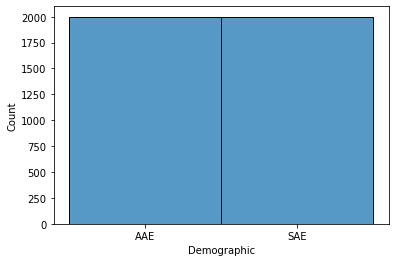

In [61]:
sns.histplot(test_raw.Demographic)

In [65]:
train_raw.groupby(['Demographic']).size()

Demographic
AAE    20000
SAE    20000
dtype: int64

In [95]:
X_train_dev = text_transformer.fit_transform(pd.concat([train_raw['text'],dev_raw['text'],unlabelled_raw['text'],test_raw['text']]))
X_train = X_train_dev[:len(train_raw),:]
y_train = train_raw['Sentiment']
X_dev = X_train_dev[len(train_raw):len(train_raw)+len(dev_raw),:]

X_train_AAE = X_train[train_raw['Demographic'] == 'AAE']
y_train_AAE = train_raw[train_raw['Demographic'] == 'AAE']['Sentiment']

X_train_SAE = X_train[train_raw['Demographic'] == 'SAE']
y_train_SAE = train_raw[train_raw['Demographic'] == 'SAE']['Sentiment']

X_dev_AAE = X_dev[dev_raw['Demographic'] == 'AAE']
y_dev_AAE = dev_raw[dev_raw['Demographic'] == 'AAE']['Sentiment']

X_dev_SAE = X_dev[dev_raw['Demographic'] == 'SAE']
y_dev_SAE = dev_raw[dev_raw['Demographic'] == 'SAE']['Sentiment']

test training the model only on AAE

In [96]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train_AAE, y_train_AAE)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.637

test training the model only on SAE

In [97]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train_SAE, y_train_SAE)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.66075

f1 score decreases for both, when compared to training on both demographics

In [98]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.67475

test making predictions only on AAE

In [99]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev_AAE)
f1_score(y_dev_AAE, y_pred, average='micro')

0.634

test making predictions only on SAE

In [100]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev_SAE)
f1_score(y_dev_SAE, y_pred, average='micro')

0.7154999999999999

*****************

### TFIDF Tweets

In [101]:
X_train = train_tfidf['TFIDF'].tolist()
X_dev = dev_tfidf['TFIDF'].tolist()
y_train = train_tfidf['Sentiment']
y_dev = dev_tfidf['Sentiment']

In [102]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.67675

### Embedding Tweets

In [103]:
X_train = train_emb['TFIDF'].tolist()
X_dev = dev_emb['TFIDF'].tolist()
y_train = train_emb['Sentiment']
y_dev = dev_emb['Sentiment']

evaluate

In [104]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.69825

best result so far on the embedded data set, faster than TFIDF, slower than raw

upload

In [68]:
train_dev_emb = pd.concat([train_emb, dev_emb])
X_train = train_dev_emb.TFIDF.tolist()
y_train = train_dev_emb['Sentiment']
X_test = test_emb.TFIDF.tolist()
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4) 
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
# for kaggle upload 
test_preds = y_pred
test_preds = logit.predict(X_test)
test_preds_df = pd.DataFrame({'Category':test_preds})
test_preds_df.index.name = 'Id'
test_preds_df.to_csv('test_predictions.csv')

Kaggle result:

0.66000

Experimental result was higher for raw tweets not embeddings

So far, word embeddings are the most effective feature representations for Logistic regression model

Questions:
- Is the model responsible for the low accuracy?
- Is the choice of feature representation causing low accuracy?

Need to test another model!

In general for tweets, a model that is supervised is not practical.
There is simply too many tweets and rapidly changing language convention for the learning to be effective and therefore unsupervised learning is more practical.

## Multinomial Naive Bayes
- Python 3 Text Processing with NLTK 3 Cookbook

In [71]:
clf = MultinomialNB()

use the tfidf features as they are nonzero

In [82]:
X_train = train_tfidf['TFIDF'].tolist()
y_train = train_tfidf['Sentiment']
X_dev = dev_tfidf['TFIDF'].tolist()
y_dev = dev_tfidf['Sentiment'].tolist()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.6755

try normalizing the features: Raw, TFIDF, embedded

In [84]:
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 
p.score(X_dev, y_dev)

0.6735

try to use embeddings

In [86]:
X_train = train_emb['TFIDF'].tolist()
y_train = train_emb['Sentiment']
X_dev = dev_emb['TFIDF'].tolist()
y_dev = dev_emb['Sentiment'].tolist()
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 
p.score(X_dev, y_dev)

0.61425

## Neural Network
- multilayer perceptron

In [116]:
X_train = train_emb['TFIDF'].tolist()
y_train = train_emb['Sentiment']
X_dev = dev_emb['TFIDF'].tolist()
y_dev = dev_emb['Sentiment']

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.68875

normalize the features

In [114]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

In [115]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.6905

try with minmax scaler

In [117]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.5

use StandardScaler

In [120]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

optimize the MLP
- number of hidden layers
- iterations/criteria
- activation function

try a different activation function

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

In [198]:
clf = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.65975

In [199]:
clf = MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.666

default activation function works best: 

‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

does increasing iterations help?

In [121]:
# default max_iter = 200
clf = MLPClassifier(max_iter=500, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.691

yes it does, what about increasing it even more?

In [122]:
clf = MLPClassifier(max_iter=5000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.6895

optimize the layers,k use an empirical approach

In [123]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.65725

In [124]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.69075

In [125]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.68325

In [126]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 4, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.7

In [127]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 7, 4, 2), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.6705

In [128]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 3, 4), random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_dev_scaled)
f1_score(y_dev, y_pred, average='micro')

0.6865

Tune the neural network parameters
- learning rate
- layers

try it on the tfidf data since feature engineering ntoe required for MLP

In [189]:
X_train = train_tfidf['TFIDF'].tolist()
y_train = train_tfidf['Sentiment']
X_dev = dev_tfidf['TFIDF'].tolist()
y_dev = dev_tfidf['Sentiment']
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 4, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.67875

# Unsupervised Learners

- VADER


https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
positive sentiment : (compound score >= 0.05) 
neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
negative sentiment : (compound score <= -0.05)

^^^ todo try using a higher weight for AAE to stablize bias (???)

In [3]:
from unsupervised import UnsupervisedClassifier

In [4]:
clf = UnsupervisedClassifier()
#clf.fit(train_raw['text'], train_emb['TFIDF'])
# testing, reduce the data size 
clf.fit(train_raw['text'].iloc[:50], train_emb['TFIDF'].iloc[:50])
clf.predict(dev_raw['text'], dev_emb['TFIDF'])

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

In [5]:
# the classifier takes series input
X_train_raw = train_raw['text']
X_train_emb = train_emb['TFIDF']

X_dev_raw = dev_raw['text']
X_dev_emb = dev_emb['TFIDF']
y_dev = dev_emb['Sentiment']


clf = UnsupervisedClassifier()

clf.fit(X_train_raw, X_train_emb)
y_pred = clf.predict(X_dev_raw, X_dev_emb)
f1_score(y_dev, y_pred, average='micro')

0.6

increase the number of clusters

In [6]:
# the classifier takes series input
X_train_raw = train_raw['text']
X_train_emb = train_emb['TFIDF']

X_dev_raw = dev_raw['text']
X_dev_emb = dev_emb['TFIDF']
y_dev = dev_emb['Sentiment']


clf = UnsupervisedClassifier(10)

clf.fit(X_train_raw, X_train_emb)
y_pred = clf.predict(X_dev_raw, X_dev_emb)
f1_score(y_dev, y_pred, average='micro')

0.57125

In [ ]:
# the classifier takes series input
X_train_raw = train_raw['text']
X_train_emb = train_emb['TFIDF']

X_dev_raw = dev_raw['text']
X_dev_emb = dev_emb['TFIDF']
y_dev = dev_emb['Sentiment']


clf = UnsupervisedClassifier(mode='simple')

clf.fit(X_train_raw, X_train_emb)
y_pred = clf.predict(X_dev_raw, X_dev_emb)
f1_score(y_dev, y_pred, average='micro')

Now that the training data has been fully predicted (without supervision)

Predict labels of the dev set and evaluate

For neutral sentiments, use KMeans clustering via embedded features

Feature embedding is pre-trained, is numeric and gives meaning according to distance in 3D space

Todo normalize Embeddings (???)

# Semisupervised learner/s

Baseline semi-supervised learner
- train the model on training and dev data
- make predictions for unlabelled data
- cross-validate the model with all of the x,y from training, dev, and unlabelled data and predictions

## Clustering, majority voting, 1NN

In [3]:
# prepare a kaggle submission from this classifier
from semisupervised import KMeansClustering1NN
clf = KMeansClustering1NN(2)

# train it on train_val and also on unlabelled data 
# see if it performs better than just KMeans alone!
X_train = np.array(train_emb['TFIDF'].tolist() + unlabelled_emb['TFIDF'].tolist())[:10]
y_train = np.array(train_emb['Sentiment'].tolist() + ['None'] * len(unlabelled_emb))[:10]

X_dev = np.array(dev_emb['TFIDF'].tolist())
y_dev = np.array(dev_emb['Sentiment'].tolist())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_dev)

print(y_dev, y_pred)

f1_score(y_dev, y_pred, average='micro')

['negative' 'positive' 'negative' ... 'positive' 'positive' 'negative'] ['positive' 'positive' 'negative' ... 'negative' 'positive' 'negative']


0.52575

In [4]:
# prepare a kaggle submission from this classifier
from semisupervised import KMeansClustering1NN
clf = KMeansClustering1NN(10)

# train it on train_val and also on unlabelled data 
# see if it performs better than just KMeans alone!
X_train = np.array(train_emb['TFIDF'].tolist() + unlabelled_emb['TFIDF'].tolist())[:10]
y_train = np.array(train_emb['Sentiment'].tolist() + ['None'] * len(unlabelled_emb))[:10]

X_dev = np.array(dev_emb['TFIDF'].tolist())
y_dev = np.array(dev_emb['Sentiment'].tolist())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_dev)

print(y_dev, y_pred)

f1_score(y_dev, y_pred, average='micro')

['negative' 'positive' 'negative' ... 'positive' 'positive' 'negative'] ['positive' 'positive' 'negative' ... 'negative' 'positive' 'negative']


0.52575

In [10]:
# prepare a kaggle submission from this classifier
from semisupervised import KMeansClustering1NN
clf = KMeansClustering1NN(2)

# train it on train_val and also on unlabelled data 
# see if it performs better than just KMeans alone!
X_train = np.array(train_val_emb['TFIDF'].tolist() + unlabeled_emb['TFIDF'].tolist())
y_train = np.array(train_val_emb['Sentiment'].tolist() + ['None'] * len(unlabeled_emb))

X_test = np.array(test_emb['TFIDF'].tolist())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Kaggle result:

0.61000

In [12]:
# try with more clusters
# prepare a kaggle submission from this classifier
from semisupervised import KMeansClustering1NN
clf = KMeansClustering1NN(10)

# train it on train_val and also on unlabelled data 
# see if it performs better than just KMeans alone!
X_train = np.array(train_val_emb['TFIDF'].tolist() + unlabeled_emb['TFIDF'].tolist())
y_train = np.array(train_val_emb['Sentiment'].tolist() + ['None'] * len(unlabeled_emb))

X_test = np.array(test_emb['TFIDF'].tolist())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# for kaggle upload 
test_preds = y_pred
test_preds_df = pd.DataFrame({'Category':test_preds})
test_preds_df.index.name = 'Id'
test_preds_df.to_csv('test_preds.csv')
test_preds_df

,Category
Id,
0,negative
1,positive
2,positive
3,negative
4,negative
...,...
3995,negative
3996,positive
3997,negative


Kaggle result with more clusters (10):

Score: 0.62749

### SelfTrainingClassifier 
- logistic regression
- support vector machines

In [3]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=17, n_jobs=4)

In [4]:
X_train = train_emb['TFIDF'].tolist()
X_dev = dev_emb['TFIDF'].tolist()
y_train = train_emb['Sentiment']
y_dev = dev_emb['Sentiment']

test it once without unlabelled data

In [5]:
clf = SelfTrainingClassifier(logit)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

In [5]:
X_train = pd.concat([train_emb, unlabelled_emb]).TFIDF.tolist()
y_train = pd.concat([train_emb, unlabelled_emb]).Sentiment.apply(lambda x: x if x != None else -1)

test with the unlabelled data

In [6]:
clf = SelfTrainingClassifier(logit)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

## Semisupervised MLP

In [3]:
X_train = train_emb['TFIDF'].tolist()
X_dev = dev_emb['TFIDF'].tolist()
y_train = train_emb['Sentiment']
y_dev = dev_emb['Sentiment']

In [107]:
# Semisupvervised MLP
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 4, 2), random_state=1)
#clf = SelfTrainingClassifier(mlp)
clf = SelfTrainingClassifier(mlp, criterion='k_best', k_best=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.6925

In [4]:
X_train = pd.concat([train_emb, unlabelled_emb]).TFIDF.tolist()
y_train = pd.concat([train_emb, unlabelled_emb]).Sentiment.apply(lambda x: x if x != None else -1)

In [5]:
# Semisupvervised MLP
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 4, 2), random_state=1)
#clf = SelfTrainingClassifier(mlp)
clf = SelfTrainingClassifier(mlp, criterion='k_best', k_best=20, max_iter=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

0.696

In [1]:
# Semisupvervised MLP
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 4, 2), random_state=1)
#clf = SelfTrainingClassifier(mlp)
clf = SelfTrainingClassifier(mlp, criterion='k_best', k_best=20, max_iter=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
f1_score(y_dev, y_pred, average='micro')

NameError: name 'MLPClassifier' is not defined